In [3]:
import torch
import torch.nn as nn

import sys
import numpy as np
import matplotlib.pyplot as plt

from model import ImageClassifier
from utils import load_mnist
from utils import split_data
from utils import get_hidden_size

파일 경로

In [4]:
model_fn = './models/model.bs-512.n_epchs-15.n_layers-3.pth'

In [5]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

저장된 model에서 GPU를 사용했을 경우들을 생각해서 map_location= 을 지졍해주어야한다.

만약 model생성시 GPU와 현재 load한 GPU가 개수나 환경이 다를경우 error발생 가능 

그래서 현재 구동하는 pc에 맞게 맞춰준다.

In [6]:
def load(fn, device):
    d = torch.load(fn, map_location=device)
    
    return d['model'], d['config']

In [7]:
def plot(x, y_hat):
    for i in range(x.size(0)):
        img = (np.array(x[i].detach().cpu(), dtype='float')).reshape(28, 28)

        plt.imshow(img, cmap='gray')
        plt.show()
        print('Predict : ', float(torch.argmax(y_hat[i], dim=-1)))

In [8]:
def test(model, x, y, to_be_shown=True):
    model.eval()

    with torch.no_grad():
        y_hat = model(x)
        
        corrent_cnt = (y.squeeze() == torch.argmax(y_hat, dim=-1)).sum()
        total_cnt = float(x.size(0))

        accuracy = corrent_cnt / total_cnt
        print('Accuracy : %.4f' % accuracy)

        if to_be_shown:
            plot(x, y_hat)

In [10]:
# load MNIST test set
x, y = load_mnist(is_train=False)
# Reshape tensor to chunk of 1-d vevtors
x = x.view(x.size(0), -1)

x, y = x.to(device), y.to(device)

input_size = int(x.shape[-1])
output_size = int(max(y)) + 1

model_dict, train_config = load(model_fn, device)

model = ImageClassifier(
    input_size,
    output_size,
    hidden_sizes = get_hidden_size(input_size,
                                    output_size,
                                    train_config.n_layers),
    use_batch_norm=not train_config.use_dropout,
).to(device)

model.load_state_dict(model_dict)

test(model, x, y, to_be_shown=False)

Accuracy : 0.9808


Accuracy : 1.0000


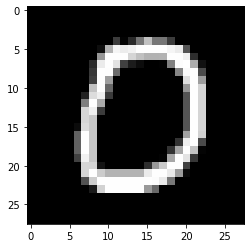

Predict :  0.0


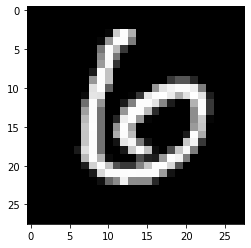

Predict :  6.0


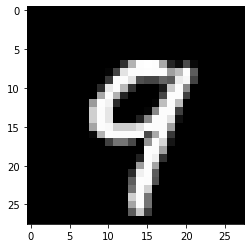

Predict :  9.0


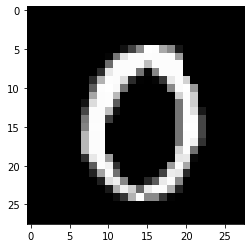

Predict :  0.0


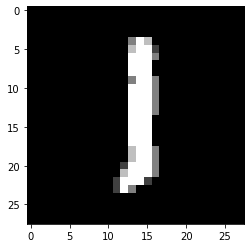

Predict :  1.0


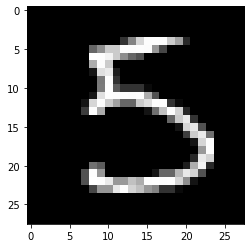

Predict :  5.0


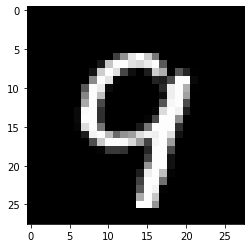

Predict :  9.0


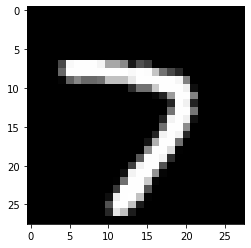

Predict :  7.0


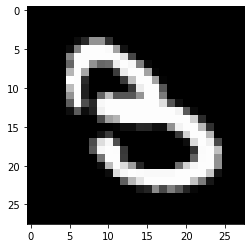

Predict :  3.0


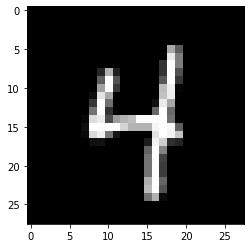

Predict :  4.0


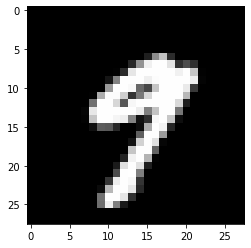

Predict :  9.0


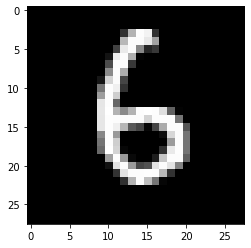

Predict :  6.0


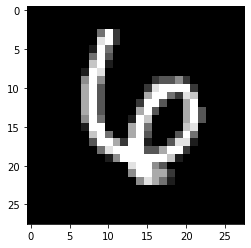

Predict :  6.0


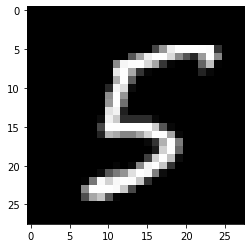

Predict :  5.0


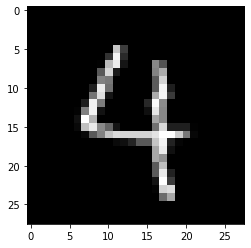

Predict :  4.0


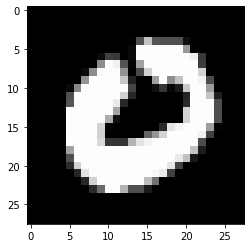

Predict :  0.0


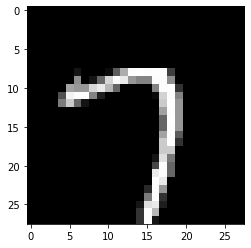

Predict :  7.0


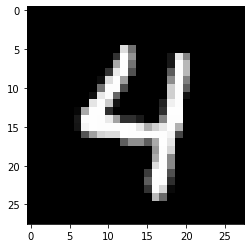

Predict :  4.0


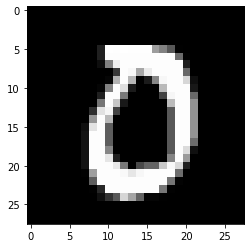

Predict :  0.0


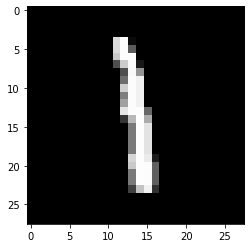

Predict :  1.0


In [12]:
n_test = 30
test(model, x[10:n_test], y[10:n_test], to_be_shown=True)